# Wine Quality Prediction
#### Predicting the quality of wine using classification algorithms and finding the best performing model.
#### Dataset used: Wine Quality Dataset (link: https://www.kaggle.com/yasserh/wine-quality-dataset)
This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [2]:
df=pd.read_csv('WineQT.csv')

## Exploring the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Exploratory Data Analysis

In [6]:
#Wine quality is independant of the ID of the wine so let's drop it
df.drop('Id',axis=1,inplace=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

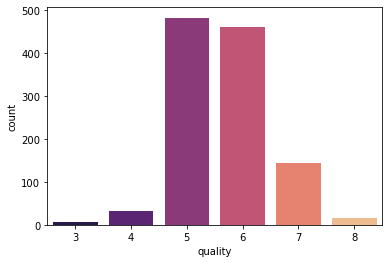

In [7]:
sns.countplot(x='quality',data=df,palette='magma')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

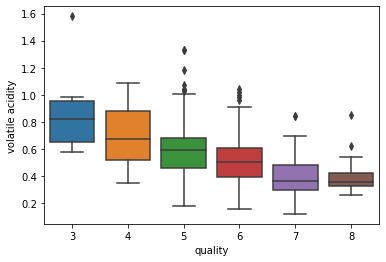

In [8]:
sns.boxplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

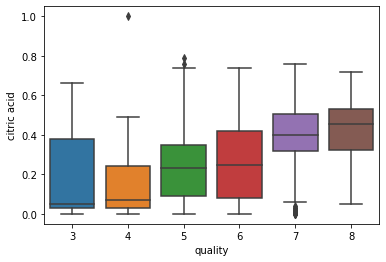

In [9]:
sns.boxplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

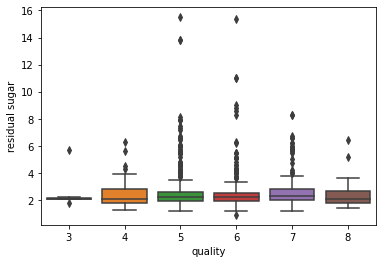

In [10]:
sns.boxplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

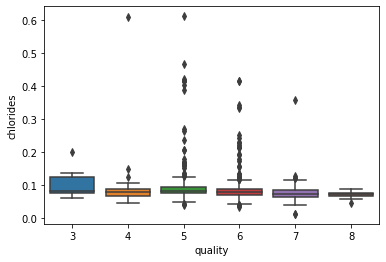

In [11]:
sns.boxplot(x='quality',y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

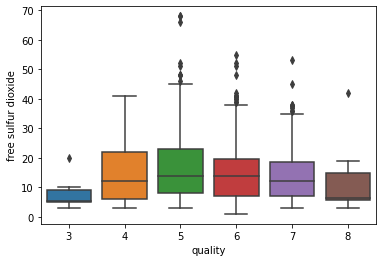

In [12]:
sns.boxplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

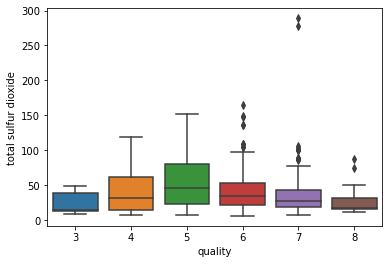

In [13]:
sns.boxplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

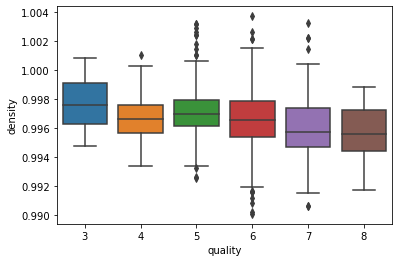

In [14]:
sns.boxplot(x='quality',y='density',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

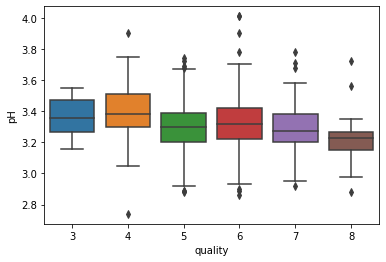

In [15]:
sns.boxplot(x='quality',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

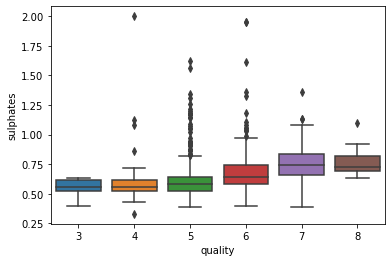

In [16]:
sns.boxplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

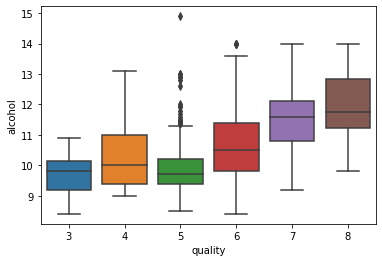

In [17]:
sns.boxplot(x='quality',y='alcohol',data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

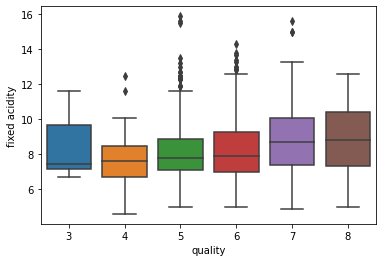

In [18]:
sns.boxplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:>

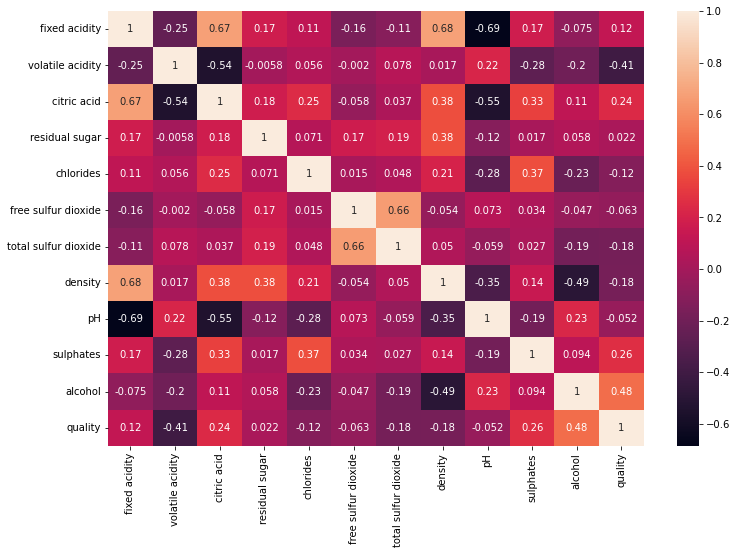

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

## Modeling

In [20]:
model=[]
accuracy=[]

### Splitting the Dataset into Training Set and Test Set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality',axis=1),df['quality'] , test_size = 0.25)

### Applying Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression 

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = classifier_lr.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
model.append('Logistic Regression')
accuracy.append(accuracy_score(y_test, y_pred))

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  4 88 36  1  0]
 [ 0  3 38 70 23  3]
 [ 0  0  0  3 13  3]
 [ 0  0  0  0  0  0]]


### KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knc = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier_knc.fit(X_train, y_train)    

KNeighborsClassifier(n_neighbors=6)

In [26]:
y_pred = classifier_knc.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
model.append('KNN Classifier')
accuracy.append(accuracy_score(y_test, y_pred))

[[ 0  0  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  2 84 41  1  1]
 [ 1  4 39 59 20  3]
 [ 0  1  2  9 16  2]
 [ 0  0  0  0  0  0]]


### Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = classifier_nb.predict(X_test)   
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
model.append('Naive Bayes Classifier')
accuracy.append(accuracy_score(y_test, y_pred))

[[ 0  1  1  0  0  0]
 [ 0  0  3  3  0  0]
 [ 1  2 57 28  1  0]
 [ 0  4 59 58 14  1]
 [ 0  0  5 14 13  2]
 [ 0  0  1  6  9  3]]


### Support Vector Classifier

In [29]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf')
classifier_svm.fit(X_train, y_train)

SVC()

In [30]:
y_pred = classifier_svm.predict(X_test)   
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
model.append('Support Vector Classifier')
accuracy.append(accuracy_score(y_test, y_pred))

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  4 85 31  2  1]
 [ 0  3 41 76 22  3]
 [ 0  0  0  2 13  2]
 [ 0  0  0  0  0  0]]


### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion = 'entropy')
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred = classifier_dtc.predict(X_test)   
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
model.append('Decision Tree Classifier')
accuracy.append(accuracy_score(y_test, y_pred))

[[ 0  0  3  0  0  0]
 [ 0  1  1  2  0  0]
 [ 1  2 88 32  2  0]
 [ 0  2 29 59 11  1]
 [ 0  1  3 15 21  3]
 [ 0  1  2  1  3  2]]


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier(n_estimators = 100)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = classifier_rfc.predict(X_test)   
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
model.append('Random Forest Classifier')
accuracy.append(accuracy_score(y_test, y_pred))

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  5 87 28  2  0]
 [ 0  2 37 73 13  1]
 [ 0  0  2  8 22  4]
 [ 0  0  0  0  0  1]]


## Comparing Model Performances 

In [35]:
res=pd.DataFrame()
res['Accuracy']=accuracy
res['Model']=model

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

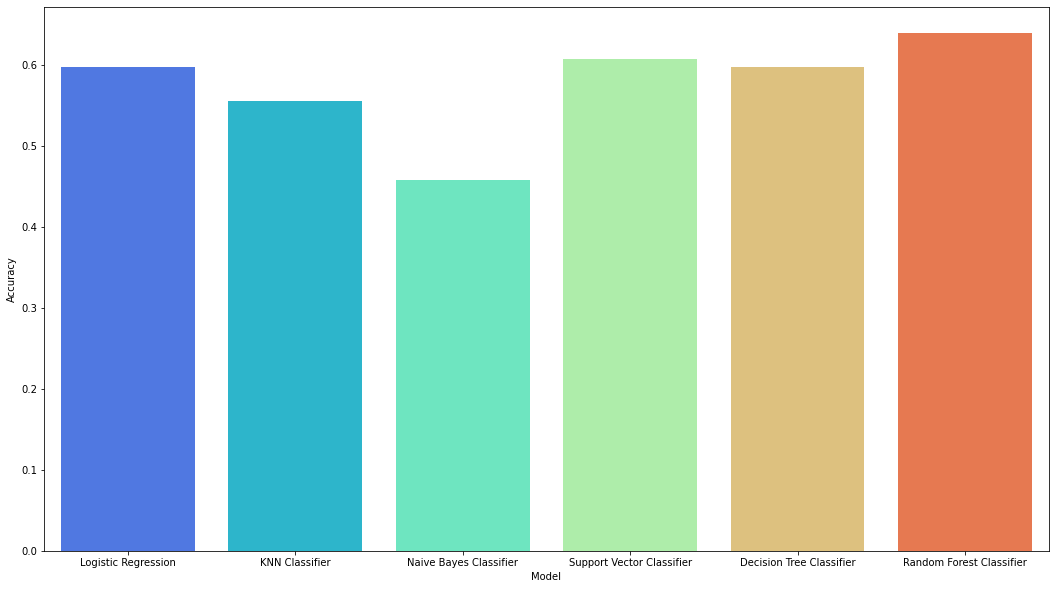

In [36]:
plt.figure(figsize=(18,10))
sns.barplot(data=res,x='Model',y='Accuracy',palette='rainbow')

### Conclusion

#### The Random Forest Classifier seems to work best for classifying the given dataset. 

In [37]:
print('Accuracy of Random Forest Classifier: '+str(accuracy[-1]))

Accuracy of Random Forest Classifier: 0.6398601398601399
